In [4]:
%load_ext autoreload
%autoreload

import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate
from joblib import dump, load
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

sys.path.append('../')
from LinearModels import display_plot_logreg, display_plot_svc
sys.path.append('../../')
from utils import feature_selection, thomas_parser, PCA_reduction, perf, time_comparison
from toBoolean import convert

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Regularization parameter

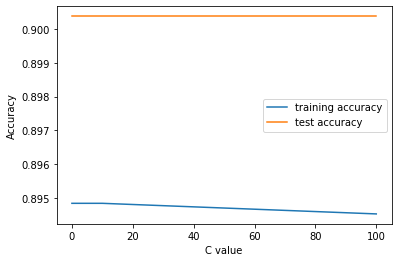

In [6]:
display_plot_logreg('../../../dumps/references/2020.02.10-12.14.csv',0.20,0.01,100)

The curves we get are nearly perfectly linear. Increase the C value does reduce a little bit the training accucary while the test one stays the same all the time (and is always better, which is quite unintuitive). We may therefore favor the smallest C value.

### Final choice

In [14]:
gt = pd.read_csv('../../../dumps/references/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [15]:
logreg = LogisticRegression(C=0.01, max_iter=100,random_state=0)
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

Training set score: 0.895
Test set score: 0.900
